In [2]:
# Dependencies
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [3]:
# Store filepaths in variables.
honda_csv = "small_sample_honda_final.csv"
ford_csv = "small_sample_ford_final.csv"
gm_csv = "small_sample_GM_final.csv"
toyota_csv = "small_sample_toyota_final.csv"
oil_csv = "WTI_Crude_Oil_Quarterly.csv"

In [4]:
honda = pd.read_csv(honda_csv)
honda = honda.rename(columns={'Revenue':'Honda Revenue'})
honda.count()


Honda            126
New Date         126
Honda Revenue    126
dtype: int64

In [5]:
gm = pd.read_csv(gm_csv, error_bad_lines=False)
gm = gm.rename(columns={'Revenue':'GM Revenue'})
gm.count()

GM            39
New Date      39
GM Revenue    39
dtype: int64

In [6]:
toyota = pd.read_csv(toyota_csv)
toyota = toyota.rename(columns={'Revenue':'Toyota Revenue'})
toyota.count()

Toyota            123
New Date          123
Toyota Revenue    123
dtype: int64

In [30]:
import datetime as dt
newer_date3 = []
for dates in toyota['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date3.append(s)
toyota["Newer Date"]=newer_date3
toyota.head()

,Toyota,New Date,Toyota Revenue,Newer Date
0,34,1988-12-31,14157.604,1988-12-31
1,33,1988-9-30,15115.341,1988-09-30
2,38,1989-12-31,15118.925,1989-12-31
3,35,1989-3-31,14168.874,1989-03-31
4,0,1989-6-30,55822.168,1989-06-30


In [7]:
ford = pd.read_csv(ford_csv)
ford = ford.rename(columns={'Revenue':'Ford Revenue'})
ford.head()

,Ford,New Date,Ford Revenue
0,32,1988-12-31,31586.4
1,36,1989-12-31,24144.9
2,33,1989-3-31,25869.0
3,34,1989-6-30,25889.7
4,35,1989-9-30,20242.3


In [8]:
import datetime as dt
newer_date2 = []
for dates in ford['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
ford["Newer Date"]=newer_date2
ford.head()

,Ford,New Date,Ford Revenue,Newer Date
0,32,1988-12-31,31586.4,1988-12-31
1,36,1989-12-31,24144.9,1989-12-31
2,33,1989-3-31,25869.0,1989-03-31
3,34,1989-6-30,25889.7,1989-06-30
4,35,1989-9-30,20242.3,1989-09-30


In [20]:
WTI_crude_oil = pd.read_csv(oil_csv)
WTI_crude_oil = WTI_crude_oil.rename(columns={'Dates':'New Date', 'Last Price':'Crude Oil Price'})

newer_date2 = []
for dates in WTI_crude_oil['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
WTI_crude_oil["Newer Date"]=newer_date2
ford.head()

,Ford,New Date,Ford Revenue,Newer Date
0,32,1988-12-31,31586.4,1988-12-31
1,36,1989-12-31,24144.9,1989-12-31
2,33,1989-3-31,25869.0,1989-03-31
3,34,1989-6-30,25889.7,1989-06-30
4,35,1989-9-30,20242.3,1989-09-30


In [16]:
# compile the list of dataframes want to merge
data_frames = [WTI_crude_oil, ford, honda, gm, toyota]

In [21]:
#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['New Date'],
                                            #how='inner'), data_frames).fillna('void')

#df_merged
df_merged = pd.merge(WTI_crude_oil, ford, on="Newer Date")
#df_merged2 = pd.merge(df_merged, honda, on="New Date")
#df_merged3 = pd.merge(df_merged2, gm, on="New Date")
#df_merged4 = pd.merge(df_merged3, toyota, on="New Date")
#df_merged4

In [24]:
# Reorganize and rename the data frame.
df_m_o = df_merged[['Newer Date', 'Crude Oil Price','Ford Revenue']]
df_mo=df_m_o.sort_values("Newer Date", ascending=True)
df_mo


,Newer Date,Crude Oil Price,Ford Revenue
119,1988-12-31,17.24,31586.4
118,1989-03-31,20.19,25869.0
117,1989-06-30,20.27,25889.7
116,1989-09-30,20.13,20242.3
115,1989-12-31,21.82,24144.9
114,1990-03-31,20.28,23600.6
113,1990-06-30,17.07,26871.7
112,1990-09-30,39.51,22986.9
111,1990-12-31,28.44,24190.8
110,1991-03-31,19.63,21341.0


In [25]:
pd.DataFrame.to_csv(df_mo, 'merged_stock_prices2.txt', sep=',', na_rep='.', index=False)

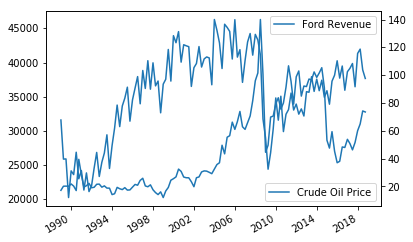

In [38]:
#fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_mo['Newer Date'], df_mo['Ford Revenue'], label="Ford Revenue")
ax1.legend(loc="upper right")
#ax1.plot(df_mo['New Date'], df_mo['GM Revenue'],label="GM Revenue")
#ax1.legend(loc="upper right")
#ax1.plot(df_mo['New Date'], df_mo['Toyota Revenue'],label="Toyota Revenue")
#ax1.legend(loc="upper right")
#ax1.plot(df_mo['New Date'], df_mo['Honda Revenue'],label="Honda Revenue")
#ax1.legend(loc="upper right")
ax2.plot(df_mo['Newer Date'], df_mo['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")



fig.autofmt_xdate()



In [32]:
df_merged2 = pd.merge(WTI_crude_oil, toyota, on="Newer Date")
df_m_o = df_merged2[['Newer Date', 'Crude Oil Price','Toyota Revenue']]
df_mo2=df_m_o.sort_values("Newer Date", ascending=True)
df_mo2


,Newer Date,Crude Oil Price,Toyota Revenue
122,1988-09-30,13.37,15115.341
121,1988-12-31,17.24,14157.604
120,1989-03-31,20.19,14168.874
119,1989-06-30,20.27,17280.552
118,1989-06-30,20.27,55822.168
117,1989-09-30,20.13,14540.134
116,1989-12-31,21.82,15118.925
115,1990-03-31,20.28,15503.940
114,1990-06-30,17.07,13478.384
113,1990-06-30,17.07,59872.936


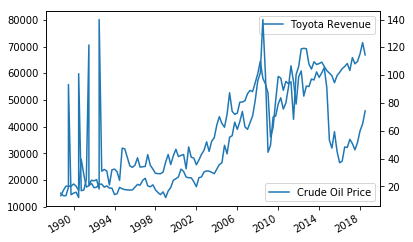

In [37]:
#fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.plot(df_mo['Newer Date'], df_mo['Ford Revenue'], label="Ford Revenue")
#ax1.legend(loc="upper right")
#ax1.plot(df_mo2['Newer Date'], df_mo2['GM Revenue'],label="GM Revenue")
#ax1.legend(loc="upper right")
ax1.plot(df_mo2['Newer Date'], df_mo2['Toyota Revenue'],label="Toyota Revenue")
ax1.legend(loc="upper right")
#ax1.plot(df_mo['Newer Date'], df_mo['Honda Revenue'],label="Honda Revenue")
#ax1.legend(loc="upper right")
ax2.plot(df_mo2['Newer Date'], df_mo2['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")



fig.autofmt_xdate()
